In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\angga\AppData\Local\Temp\ipykernel_20644\1905803957.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
student_perform = pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/StudentsPerformance.csv')
sleep = pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/sleep_dat.csv')

In [4]:
display(HTML('<center><b><h3>Student Performance</h3></b></center><br>'))
display(student_perform.head())
print('\n')
display(HTML('<center><b><h3>Sleep Record</h3></b></center><br>'))
display(sleep.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Measurement of Central Tendency

In [5]:
print('Daily Steps in Average:',sleep['Daily Steps'].mean(),'steps')
print('Median of Daily Steps:',sleep['Daily Steps'].median(),'steps')
print('Mode of Daily Steps:',sleep['Daily Steps'].mode().values[0],'steps')

Daily Steps in Average: 6816.844919786096 steps
Median of Daily Steps: 7000.0 steps
Mode of Daily Steps: 8000 steps


In [ ]:
print(sleep['Occupation'].mode())

0    Nurse
Name: Occupation, dtype: object


In [ ]:
sleep['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

# Measurement of Dispersion

## Range

In [ ]:
range = sleep['Daily Steps'].max() - sleep['Daily Steps'].min()
print('Range of daily steps:',range)

Range of daily steps: 7000


## Quartile

In [7]:
q1 = sleep['Daily Steps'].quantile(0.25)
q2 = sleep['Daily Steps'].quantile(0.5)
q3 = sleep['Daily Steps'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 5600.0
Q2: 7000.0
Q3: 8000.0
Interquartile Range (IQR): 2400.0


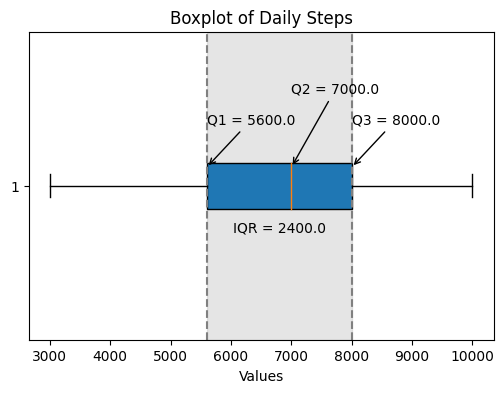

In [ ]:
#@title Illustration of Quartile on Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(sleep['Daily Steps'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Daily Steps')

plt.show()

## Variance

In [12]:
variance = sleep['Daily Steps'].var()
print('Variance of daily steps data:',variance)

Variance of daily steps data: 2617651.144786455


## Standard Deviation

In [16]:
import math
math.sqrt(sleep['Daily Steps'].var())

1617.915679133636

In [13]:
std = sleep['Daily Steps'].std()
print('Standard Deviation of daily steps data:',std)

Standard Deviation of daily steps data: 1617.915679133636


From result of variance we know that in a group of people, the daily walking steps are high variety and based on the standard deviasion, we know that the variation itself not really that spread since the daily steps in average is 6800 steps/person/day.

# Distribution

## Discrete

<Axes: xlabel='Stress Level'>

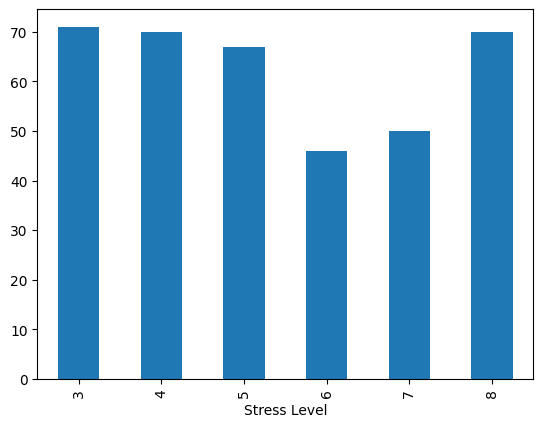

In [11]:
sleep['Stress Level'].value_counts().sort_index().plot(kind='bar')

What kind of this distribution?

## Continuous

<Axes: ylabel='Frequency'>

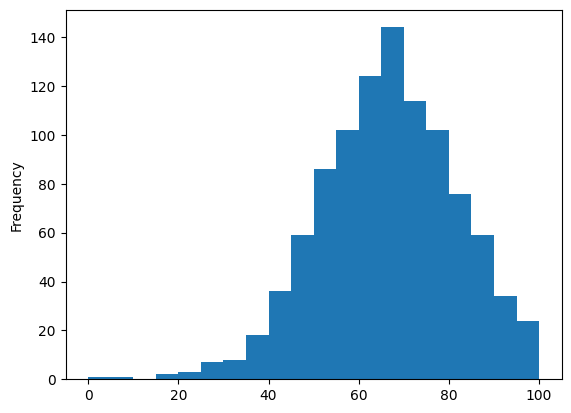

In [ ]:
student_perform['math score'].plot(kind='hist',bins=20)

From image above, the data is looked like to be normal but with outlier severity and quite skew.

## Normality Test

### Testing

#### D’Agostino’s K^2 Test

This test combine skewness and kurtosis values to validate a data is normal or not. We will use condition that if `p-value` more than 0.05, the data has normal distribution.

In [ ]:
res = stats.normaltest(student_perform['math score'])
print(f'p-value: {res.pvalue}') #ga normal

p-value: 0.00045080293869937836


#### Shapiro-Wilk Test

This testing tool is another way to test the normality of a data. The condition is the same as D'Agostino K^2 Test.

In [ ]:
res = stats.shapiro(student_perform['math score'])
print(f'p-value: {res.pvalue}') #ga normal

p-value: 0.000144938996527344


Unfortunately, our `math score` data has not normal distribution, but visually shows a different insight. We need to perform other tests.

### Skewness and Kurtosis

- **Skew** is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
- **Kurtosis** quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

Skewness and Kurtosis values are very common and very easy to use to analyze whether a data has normal distribution or not.

In [ ]:
print(f"Skewness: {student_perform['math score'].skew()}")

Skewness: -0.27893514909431694


The data has left-skewed distribution but it's still more than -0.5 so it's moderately skewed. However, we can still conclude that the data distribution is almost normal.

In [18]:
print(f"Kurtosis: {student_perform['math score'].kurtosis()}")

Kurtosis: 0.27496405752108455


The data's kurtosis type is leptokurtic which means that it has more havy tail than a normal distribution. Perhaps it makes the data is looked like not normal.

However, if we check the average and median once again, it tend to be normal distribution.

In [ ]:
print('Average:',student_perform['math score'].mean())
print('Median:',student_perform['math score'].median())

Average: 66.089
Median: 66.0


In our case, we conclude that the `math score` has normal distribution since it proved by several tests, but failed only in two tests.

# Outliers and Extreme Values Analysis

The `math score` has several outliers that indicated by the visualization and kurtosis value. But we can also use boxplot to validate it.

<Axes: >

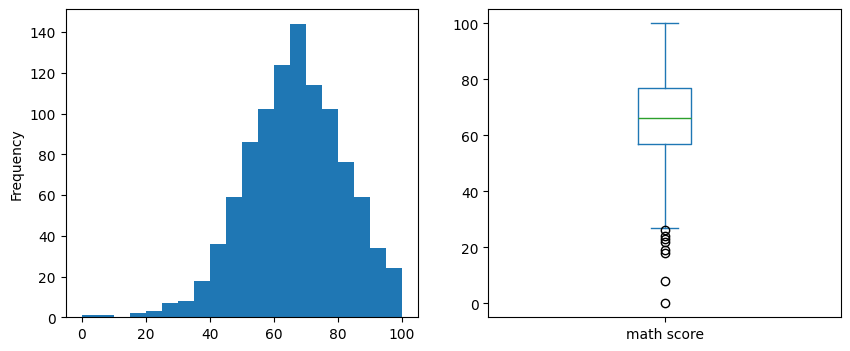

In [20]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

student_perform['math score'].plot(kind='hist',bins=20,ax=ax[0])
student_perform['math score'].plot(kind='box',ax=ax[1])

## Normal Distribution: Z-Score

In [21]:
student_perform['math score'].skew()

np.float64(-0.27893514909431694)

In [ ]:
avg = student_perform['math score'].mean()
std = student_perform['math score'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 111.58
Lower Boundary: 20.60


In [22]:
no_outlier = student_perform['math score'][(student_perform['math score']>=low_bound) & (student_perform['math score']<=up_bound)]

In [26]:
no_outlier.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [24]:
outlier = student_perform['math score'][(student_perform['math score']<low_bound) | (student_perform['math score']>up_bound)]

In [27]:
outlier.head()

17     18
59      0
145    22
338    24
466    26
Name: math score, dtype: int64

In [28]:
outlier = student_perform['math score'][(student_perform['math score']<low_bound) | (student_perform['math score']>up_bound)]
no_outlier = student_perform['math score'][(student_perform['math score']>=low_bound) & (student_perform['math score']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(student_perform["math score"]):.2f}%%')

Percentage of outliers: 0.80%%


<Axes: >

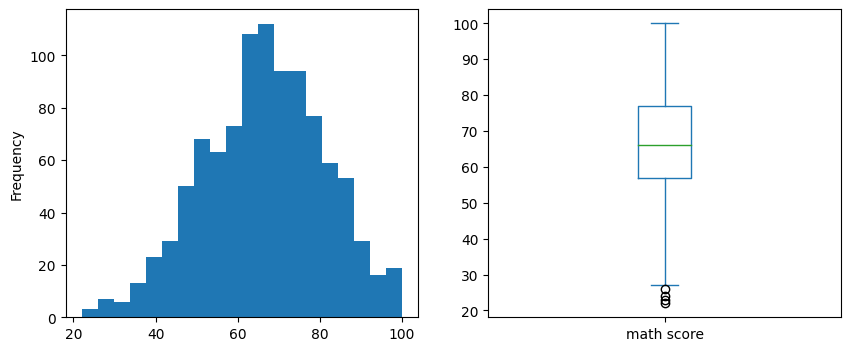

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Outliers still remain in the data

## Skew Distribution: Tukey's Rule

In [31]:
sleep['Heart Rate'].skew()

np.float64(1.2248235470533522)

In [30]:
q1 = sleep['Heart Rate'].quantile(0.25)
q3 = sleep['Heart Rate'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 78.00
Lower Boundary: 62.00


In [33]:
outlier = sleep['Heart Rate'][(sleep['Heart Rate']<low_bound) | (sleep['Heart Rate']>up_bound)]
no_outlier = sleep['Heart Rate'][(sleep['Heart Rate']>=low_bound) & (sleep['Heart Rate']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(sleep["Heart Rate"]):.2f}%%')

Percentage of outliers: 4.01%%


<Axes: >

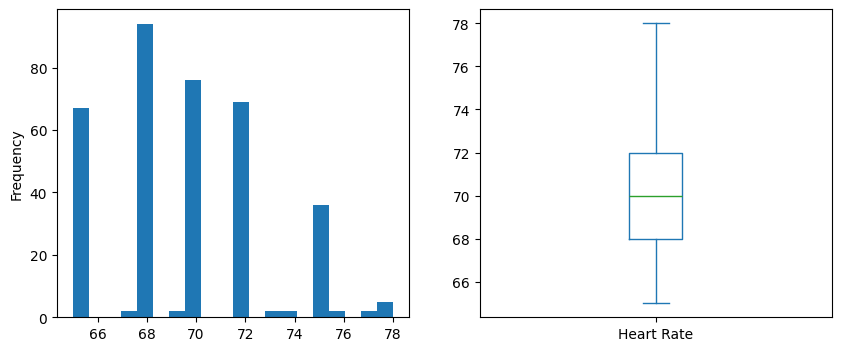

In [34]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [35]:
len(sleep['Heart Rate'])

374

In [36]:
len(no_outlier)

359

The outliers has gone.

But, why it can be? it is so strange that using z-score method to measure the upper and lower boundaries, we still got outliers in our data but using tukey's rule, the outliers has gone. Meanwhile, our data distribution is normal.

This confusion can be explained that the boxplot itself constructed by quartile, which means tend to handle skewed data better than normal.

Don't worry, you are in the right path since our steps is right.

# Correlation Analysis

## Scipy

In [37]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


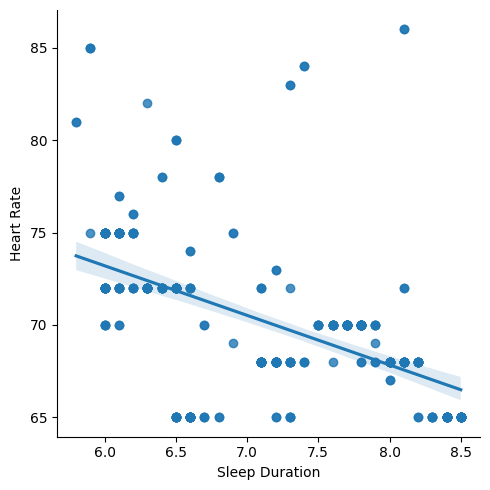

In [ ]:
sns.lmplot(data=sleep,x='Sleep Duration', y='Heart Rate')

In [ ]:
corr_r, pval_p = stats.pearsonr(sleep['Sleep Duration'], sleep['Heart Rate'])
corr_rho, pval_s = stats.spearmanr(sleep['Sleep Duration'], sleep['Heart Rate'])
corr_tau, pval_k = stats.kendalltau(sleep['Sleep Duration'], sleep['Heart Rate'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.52, p-value: 6.914740131849277e-27
rho-correlation: -0.61, p-value: 2.5508723014277034e-39
tau-correlation: -0.46, p-value: 3.28670670665191e-33


p-value used to provide information whether the correlation is real or just by chance or not significance, otherwise it is real.

If p-value more than 0.05, so the correlation between two variables is by chance.

In our case, the correlation between sleep duration and heart rate is by real, and based on Pearson and Spearman correlation, the show that those variables has moderate correlation.

## Pandas

In [ ]:
print(f"r-correlation: {sleep['Sleep Duration'].corr(sleep['Heart Rate']):.2f}")
print(f"rho-correlation: {sleep['Sleep Duration'].corr(sleep['Heart Rate'], method='spearman'):.2f}")
print(f"tau-correlation: {sleep['Sleep Duration'].corr(sleep['Heart Rate'], method='kendall'):.2f}")

r-correlation: -0.52
rho-correlation: -0.61
tau-correlation: -0.46
